<a href="https://colab.research.google.com/github/victorezealuma/Stock_Portfolio_Optimization/blob/main/Portfolio_Opt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The goal of this project is to optimize a porfolio of stocks using Efficient Frontier

In [ ]:
# Geting some information from yahoo finance
!pip install yfinance

### Import & Install Libraries

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('_classic_test_patch')
from scripts.data_preprocessing import preprocess_portfolio_data


ModuleNotFoundError: No module named 'scripts.data_preprocessing'

### Data Collection:  Accessed yahoo finance API for historical stock data

In [6]:
import pandas as pd

portfolio_tickers = ["BRK-B","CRM","PFE","BA","AMT"]

historical_data = yf.download(portfolio_tickers, start="2021-04-01", end=None)["Adj Close"]

historical_data

historical_data.to_csv("historical_data.csv")

print("historical_data.csv")

[*********************100%%**********************]  5 of 5 completed

historical_data.csv


In [7]:
historical_data = pd.read_csv("historical_data.csv")
display(historical_data)

,Date,AMT,BA,BRK-B,CRM,PFE
0,2021-04-01,221.828613,252.960007,258.200012,218.434662,32.232868
1,2021-04-05,226.162415,259.359985,262.660004,220.002609,32.215122
2,2021-04-06,225.081268,255.169998,263.059998,220.801575,32.010887
3,2021-04-07,226.125473,252.580002,263.619995,220.501953,31.886576
4,2021-04-08,222.798874,254.949997,263.510010,224.157181,31.930967
...,...,...,...,...,...,...
749,2024-03-25,195.559998,191.410004,409.920013,306.059998,27.430000
750,2024-03-26,194.100006,187.500000,411.570007,305.829987,27.590000
751,2024-03-27,197.380005,191.949997,416.929993,301.380005,27.780001
752,2024-03-28,197.589996,192.990005,420.519989,301.179993,27.750000


### Visualization of Portfolio Adjusted Price History over time

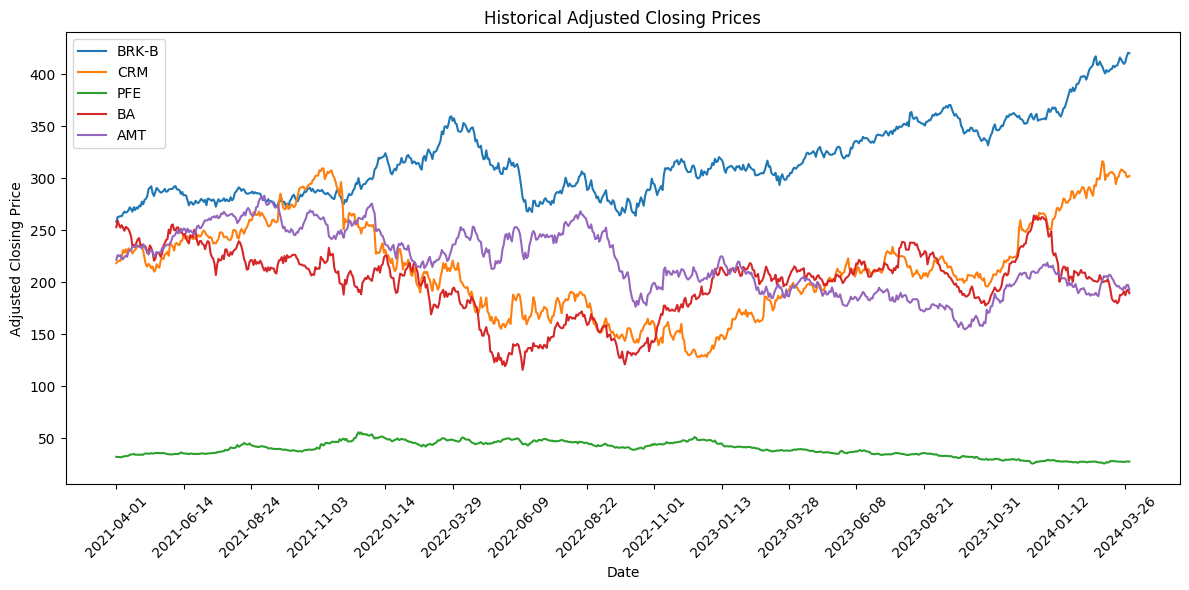

In [8]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for ticker in portfolio_tickers:
    plt.plot(historical_data["Date"], historical_data[ticker], label=ticker)

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Historical Adjusted Closing Prices")
plt.legend()
plt.grid(False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Adjust the number as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()